In [3]:
# pip install python-binance
import pandas as pd
import numpy as np
from binance.client import Client
import plotly.graph_objects as go
import requests
import time
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

from scipy.stats import bernoulli
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import os

# Binance API credentials
api_key = 'zMMoF47K9D6u1UrEs0SF5ZgwDtYsLfZYPPd2hDme5XtUJJOd6gogsVw8ibNu7mxM'
api_secret = 'xPqzQ87NvKFawOcYizIC81Ui3s7oQsBxPvXaD4t7LR85AtUhYeJL9XLnvwmoLPLN'

#Telegram Bot
TOKEN = "7440240128:AAHGgBidb-mEjSOfzWXJ2hzY8UupUDlvKEs"
CHAT_ID = "5097888685"

# Initialize Binance client
client = Client(api_key, api_secret)

In [4]:
#get crypto data from binance

def get_historical_klines(symbol, interval, lookback):
    """
    Fetch historical klines (candlestick) data from Binance.
    :param symbol: Trading pair symbol (e.g., 'BTCUSDT')
    :param interval: Timeframe for candlesticks (e.g., '1h', '1d')
    :param lookback: Lookback period (e.g., '1 day ago UTC',2 months ago UTC)
    :return: Pandas DataFrame with OHLCV data
    """
    try:
        klines = client.get_historical_klines(symbol, interval, lookback)
        df = pd.DataFrame(klines, columns=[
            'timestamp', 'open', 'high', 'low', 'close', 'volume', 
            'close_time', 'quote_asset_volume', 'number_of_trades', 
            'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
        ])
        df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume']]
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        time_to_add = pd.Timedelta(hours=5, minutes=30)
        df['timestamp'] = df['timestamp']+time_to_add
        df['date'] = df['timestamp'].apply(lambda x: datetime.strftime(x, "%Y-%m-%d"))
        #df.set_index('timestamp', inplace=True)
        df['loc_index'] = list(range(len(df)))
        df['open'] = df.open.astype(float)
        df['high'] = df.high.astype(float)
        df['low'] = df.low.astype(float)
        df['close'] = df.close.astype(float)
        df['volume'] = df.volume.astype(float)
        #df = df.astype(float)
        return df
    except Exception as e:
        raise Exception(f"Error fetching data: {e}")
    


In [3]:
# Get Data
symbol = 'BTCUSDT'  # Trading pair symbol
interval = '5m'  # Time interval (e.g., '1h', '1d')
lookback = '1 day ago UTC'  # Lookback period

# Fetch data
df = get_historical_klines(symbol, interval, lookback)
df.to_csv('currentData.csv')

#df.dtypes
# print("First element")
# print(df.iloc[0, 0])
# print("First element")
# print(df.iloc[-1, 0])

#last close value
#print(df.iloc[-1,4])
df

,timestamp,open,high,low,close,volume,date,loc_index
0,2025-02-18 20:55:00,95581.89,95653.40,95368.52,95403.51,73.11079,2025-02-18,0
1,2025-02-18 21:00:00,95403.51,95530.39,95362.25,95415.00,67.81579,2025-02-18,1
2,2025-02-18 21:05:00,95414.99,95722.73,95404.85,95649.13,75.64753,2025-02-18,2
3,2025-02-18 21:10:00,95649.14,95718.68,95530.30,95531.77,79.68790,2025-02-18,3
4,2025-02-18 21:15:00,95531.77,95598.36,95383.76,95456.65,74.76426,2025-02-18,4
...,...,...,...,...,...,...,...,...
283,2025-02-19 20:30:00,95766.33,95816.00,95571.47,95749.51,122.43429,2025-02-19,283
284,2025-02-19 20:35:00,95749.51,95942.08,95536.36,95675.74,189.87079,2025-02-19,284
285,2025-02-19 20:40:00,95675.74,95815.75,95675.74,95774.01,79.01059,2025-02-19,285
286,2025-02-19 20:45:00,95774.01,96030.45,95680.01,95963.74,79.93414,2025-02-19,286


In [16]:
#Send telegram message
message = "hello, world"
url = f"https://api.telegram.org/bot{TOKEN}/sendMessage?chat_id={CHAT_ID}&text={message}"
r= requests.get(url)
print(r.json())

#Send telegram pictures
files = {'photo': open('alert/alert.PNG', 'rb')}
resp = requests.post('https://api.telegram.org/bot7440240128:AAHGgBidb-mEjSOfzWXJ2hzY8UupUDlvKEs/sendPhoto?chat_id=5097888685', files=files)
print(resp.json())

{'ok': True, 'result': {'message_id': 9, 'from': {'id': 7440240128, 'is_bot': True, 'first_name': 'Aladdin 2.0', 'username': 'Aladdin007_BOT'}, 'chat': {'id': 5097888685, 'first_name': 'Souvik', 'username': 'SouvikDaw', 'type': 'private'}, 'date': 1739804656, 'text': 'hello, world'}}
{'ok': True, 'result': {'message_id': 10, 'from': {'id': 7440240128, 'is_bot': True, 'first_name': 'Aladdin 2.0', 'username': 'Aladdin007_BOT'}, 'chat': {'id': 5097888685, 'first_name': 'Souvik', 'username': 'SouvikDaw', 'type': 'private'}, 'date': 1739804657, 'photo': [{'file_id': 'AgACAgUAAxkDAAMIZ7NPVYspqrzf_t7fiIaU8oQqEkMAAh7EMRu665hVMqmA_27tIM4BAAMCAANzAAM2BA', 'file_unique_id': 'AQADHsQxG7rrmFV4', 'file_size': 750, 'width': 90, 'height': 45}, {'file_id': 'AgACAgUAAxkDAAMIZ7NPVYspqrzf_t7fiIaU8oQqEkMAAh7EMRu665hVMqmA_27tIM4BAAMCAANtAAM2BA', 'file_unique_id': 'AQADHsQxG7rrmFVy', 'file_size': 11101, 'width': 320, 'height': 161}, {'file_id': 'AgACAgUAAxkDAAMIZ7NPVYspqrzf_t7fiIaU8oQqEkMAAh7EMRu665hVMqmA_27

In [5]:
# Function to plot candle stick chart

def candlestick_ax(t, o, h, l, c):
    t_index = list(range(len(t)))

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)

    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    ax.bar(x=t_index, height=h-l, bottom=l, width=0.1, color=color)
    ax.bar(x=t_index, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color)

    t_loc = t_index[::7200]
    #if type(t[0]) == datetime or type(t[0]) == pd._libs.tslibs.timestamps.Timestamp:
    #    label_loc = [datetime.strftime(x, '%H-%M') for x in t[::12]]
    label_loc = [x[:10] for x in t[::7200]]
    ax.set_xticks(ticks=t_loc, labels=label_loc, rotation=45);

    return ax

In [6]:
#get the best fit slope and put it in top
def get_init_slope_intercept(df):
    """Calculate initial best-fit resistance line using Linear Regression."""
    X = df[['loc_index']].values  # Independent variable
    y = df['mid'].values  # Dependent variable

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficients
    slope = model.coef_[0]
    intercept = model.intercept_

    best_fit = X * slope + intercept

    # Use the highest price points to calculate resistance
    df['candle_top'] = df[['open', 'close']].max(axis=1)

    # Compute offsets to shift trendline down to touch candle tops
    offsets = df['candle_top'].values - best_fit[:, 0]
    max_offset = min(offsets)  # We take min(offsets) to lower the line
    intercept_2 = intercept + max_offset  # Adjust intercept

    return slope, intercept_2

#get the best fit slope
def get_best_fit_slope_intercept(df):
    """Calculate the initial best-fit line without adjustments."""
    X = df[['loc_index']].values  # Independent variable
    y = df['mid'].values  # Dependent variable

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Get the coefficients
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept

# Objective function to minimize: sum of squared differences for resistance line
def objective(params, X, candle_top):
    m, b = params
    line = m * X + b
    return np.sum((line - candle_top) ** 2)  # Minimize distance from candle tops

# Constraint function to ensure resistance line stays above candle tops
def constraint(params, X, candle_top):
    m, b = params
    line = m * X + b
    return line - candle_top  # Ensure line >= candle_top

# adjust the final slope to match resistance points
def get_final_slope_intercept(df_new, slope_init, intercept_init):
    """Optimize the resistance trendline using scipy minimize."""
    initial_params = [slope_init, intercept_init]
    X = df_new[['loc_index']].values

    # Define highest price levels as resistance
    df_new['candle_top'] = df_new[['open', 'close']].max(axis=1)

    # Define constraints
    constraints = {
        'type': 'ineq',  # Ensures line stays above candle tops
        'fun': constraint,
        'args': (X.flatten(), df_new['candle_top'].values)
    }

    # Perform the optimization
    result = minimize(
        objective,
        initial_params,
        args=(X.flatten(), df_new['candle_top'].values),
        constraints=constraints,
        method='SLSQP'
    )

    optimized_slope, optimized_intercept = result.x
    return optimized_slope, optimized_intercept

def visualize_trendline(df_new, slope, intercept):
    """Plot candlestick chart with resistance trendline."""
    _ax = candlestick_ax(t=df_new['date'], o=df_new['open'], h=df_new['high'], l=df_new['low'], c=df_new['close'])
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X * slope + intercept
    plt.plot(X - min(X), best_fit_init[:, 0], 'r-')  # Red line for resistance

def safegraph(df_new, slope, intercept, name):
    """Save the resistance trendline chart in the alert folder."""
    os.makedirs("alert", exist_ok=True)  # Ensure directory exists
    _ax = candlestick_ax(t=df_new['date'], o=df_new['open'], h=df_new['high'], l=df_new['low'], c=df_new['close'])
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X * slope + intercept
    plt.plot(X - min(X), best_fit_init[:, 0], 'r-')  # Red line for resistance
    file_path = os.path.join("alert", name)
    plt.savefig(file_path)
    plt.close()

def candles_close_to_trendline(df_new, slope, intercept):
    """Find the last value of the resistance trendline."""
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X * slope + intercept
    return best_fit_init[-1, 0]

def dist_from_trendline(df_new, slope, intercept, percentile=50):
    """Calculate percentile-based distance from the resistance line."""
    X = df_new[['loc_index']].values  # Independent variable
    best_fit_init = X * slope + intercept
    trendline_dist = df_new['candle_top'].values - best_fit_init[:, 0]
    return np.nanpercentile(trendline_dist, percentile)


From Time
2025-02-22 05:51:00
To Time
2025-02-22 10:50:00
close


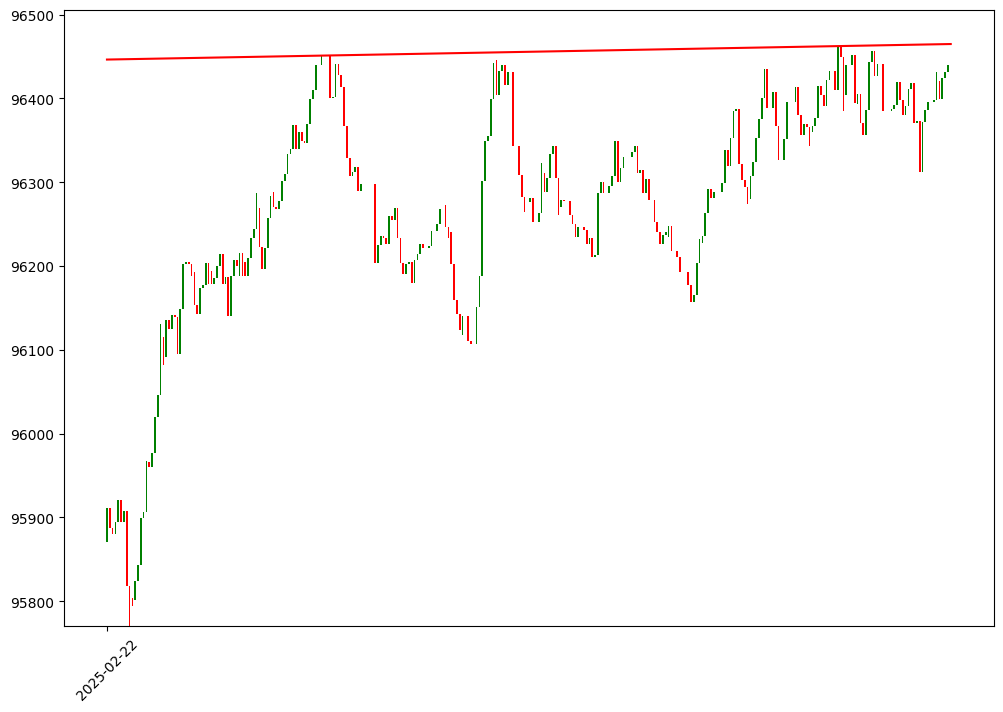

In [7]:
#1 hour analysis
symbol = 'BTCUSDT'  
interval = '1m'  
lookback = '5 hours ago UTC'

# Fetch data
df = get_historical_klines(symbol, interval, lookback)
print("From Time")
print(df.iloc[0, 0])
print("To Time")
print(df.iloc[-1, 0])

#_ax = candlestick_ax(t=df['date'], o=df['open'], h=df['high'], l=df['low'], c=df['close'])
df['mid'] = (df['open'] + df['close'])/2
slope_init, intercept_init = get_init_slope_intercept(df)
slope_final, intercept_final = get_final_slope_intercept(df, slope_init, intercept_init)
visualize_trendline(df, slope_final, intercept_final)

support = candles_close_to_trendline(df, slope_final, intercept_final)
current = df.iloc[-1,4]

if (abs(current-support))<100:
    print("close")
    name = str(int(current)) +" at "+ str(int(support))+".png"
    safegraph(df, slope_final, intercept_final,name)
    # #Send telegram message
    # message = "BTC Chart at resistance level at 1 hour tf"
    # url = f"https://api.telegram.org/bot{TOKEN}/sendMessage?chat_id={CHAT_ID}&text={message}"
    # r= requests.get(url)
    # print(r.json())

    # #Send telegram pictures
    # files = {'photo': open('alert/'+ name, 'rb')}
    # resp = requests.post('https://api.telegram.org/bot7440240128:AAHGgBidb-mEjSOfzWXJ2hzY8UupUDlvKEs/sendPhoto?chat_id=5097888685', files=files)
    # print(resp.json())


In [7]:
def resistance_by_hours(symbol,time):
    #1 hour analysis
    symbol = symbol  
    interval = '1m'  
    lookback = str(time)+' hours ago UTC'

    # Fetch data
    df = get_historical_klines(symbol, interval, lookback)
    print("From Time")
    print(df.iloc[0, 0])
    print("To Time")
    print(df.iloc[-1, 0])

    #_ax = candlestick_ax(t=df['date'], o=df['open'], h=df['high'], l=df['low'], c=df['close'])
    df['mid'] = (df['open'] + df['close'])/2
    slope_init, intercept_init = get_init_slope_intercept(df)
    slope_final, intercept_final = get_final_slope_intercept(df, slope_init, intercept_init)
    visualize_trendline(df, slope_final, intercept_final)

    support = candles_close_to_trendline(df, slope_final, intercept_final)
    current = df.iloc[-1,4]

    difference = 0
    if (symbol == 'BTCUSDT'):
        difference = 100
    elif(symbol == 'ETHUSDT'):
        difference = 20
    else:
        difference = 20
    
    print(difference)

    if (abs(current-support))<difference:
        print("close")
        name = str(int(current)) +" at "+ str(int(support))+".png"
        safegraph(df, slope_final, intercept_final,name)
        # #Send telegram message
        # message = "BTC Chart at resistance level at 1 hour tf"
        # url = f"https://api.telegram.org/bot{TOKEN}/sendMessage?chat_id={CHAT_ID}&text={message}"
        # r= requests.get(url)
        # print(r.json())

        # #Send telegram pictures
        # files = {'photo': open('alert/'+ name, 'rb')}
        # resp = requests.post('https://api.telegram.org/bot7440240128:AAHGgBidb-mEjSOfzWXJ2hzY8UupUDlvKEs/sendPhoto?chat_id=5097888685', files=files)
        # print(resp.json())


From Time
2025-02-22 08:56:00
To Time
2025-02-22 11:55:00
100
From Time
2025-02-22 08:56:00
To Time
2025-02-22 11:55:00
20
close


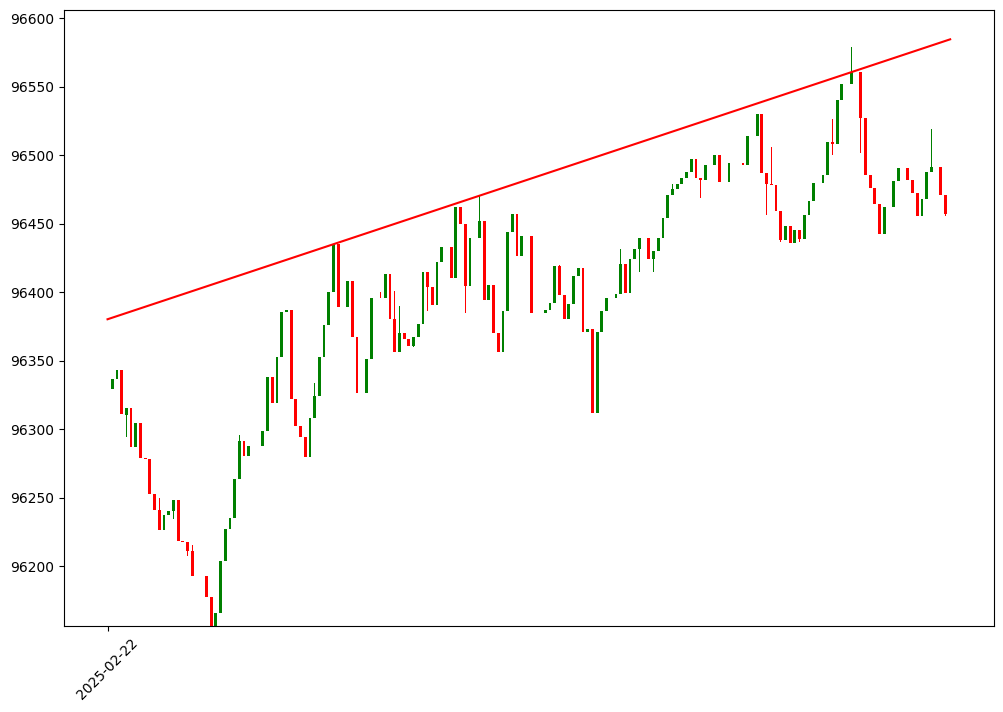

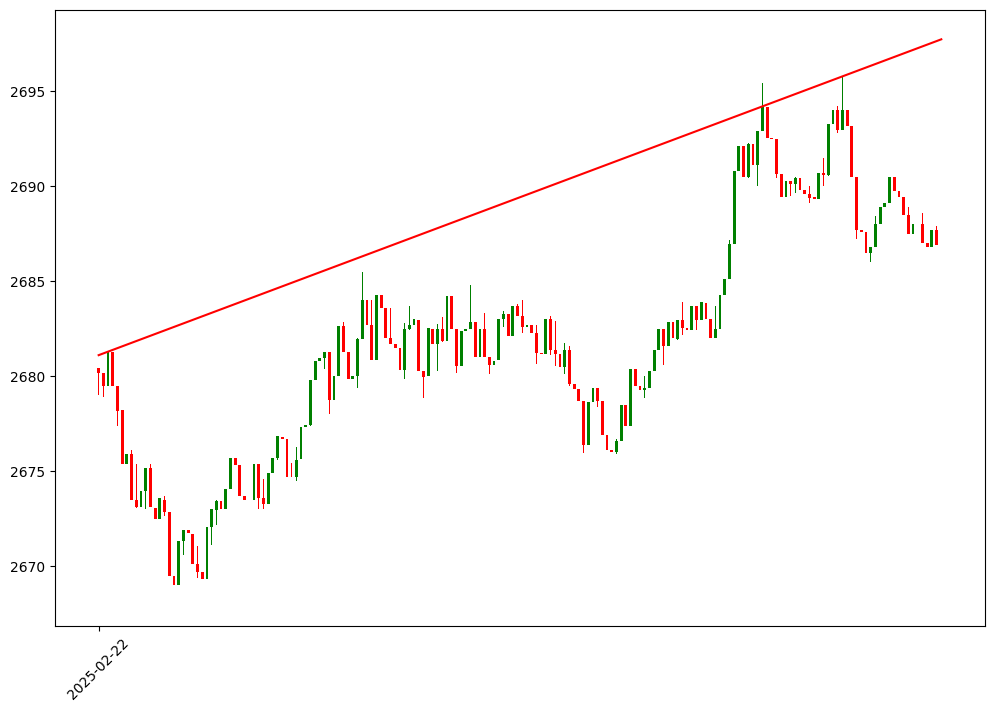

In [8]:
resistance_by_hours('BTCUSDT','3')
resistance_by_hours('ETHUSDT','3')